In [2]:
#Description: This Mini Project is an application of the concept of Long Short Term Memory(LSTM) which is domain of Data Science
#Objective: To predict the closing stock price of company IBM using the past stock price in USD

In [3]:
#Importing The libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:

# Get the stock quote
df = yf.download('IBM', start='2012-06-29', end='2023-08-29')

# Show the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-06-29,185.994263,187.198853,183.948380,186.978973,120.866608,5501542
2012-07-02,187.724670,188.527725,186.281067,187.217972,121.021080,2957042
2012-07-03,186.864243,187.705551,186.338425,187.313583,121.082916,1517118
2012-07-05,186.309753,188.193115,185.114716,186.701721,120.687355,2813949
2012-07-06,185.391968,185.411087,181.395798,182.992355,118.289536,5180733
...,...,...,...,...,...,...
2023-08-22,142.660004,143.229996,141.300003,141.490005,141.490005,3557500
2023-08-23,141.720001,143.479996,141.580002,143.410004,143.410004,2559100
2023-08-24,143.509995,144.470001,143.220001,143.550003,143.550003,2900200


In [5]:
# Note here due to changes in yahoo API if we use pandas data reader it would lead to an error
#     therefore we use yfinance which works great as of now

In [6]:
#get the number of rows and column in the dataset
df.shape

(2808, 6)

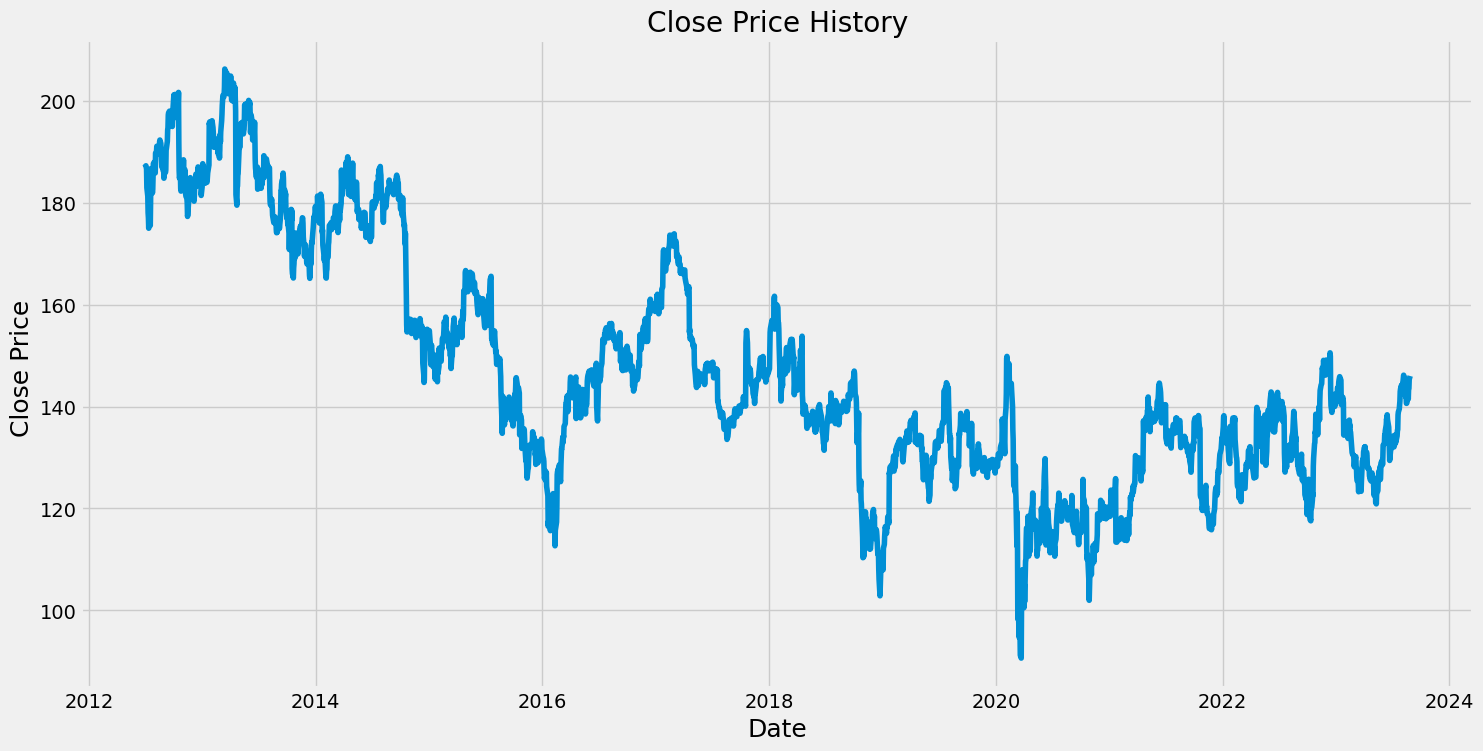

In [7]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price ', fontsize = 18)
plt.show()

In [8]:
#Create the new dataframe with only the Close Column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2247

In [9]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.83293402],
       [0.83499956],
       [0.83582588],
       ...,
       [0.45759978],
       [0.47315628],
       [0.47894673]])

In [10]:
#Create the training dataset
#create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train datasets
x_train = []
y_train =[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()


[array([0.83293402, 0.83499956, 0.83582588, 0.83053787, 0.79847973,
       0.78410311, 0.75592826, 0.74758328, 0.72973639, 0.75386272,
       0.74378254, 0.73436332, 0.77237042, 0.83095103, 0.80707263,
       0.79368757, 0.78963891, 0.79575311, 0.81946627, 0.83962649,
       0.84202263, 0.83623891, 0.829629  , 0.82359748, 0.85722545,
       0.85920844, 0.86887545, 0.86143935, 0.85639926, 0.86358757,
       0.86127411, 0.85532515, 0.85623402, 0.87639424, 0.87953402,
       0.87358506, 0.85829956, 0.84673224, 0.83392545, 0.8510287 ,
       0.83384289, 0.82706761, 0.82880281, 0.81467397, 0.82690237,
       0.82434112, 0.8284722 , 0.86201761, 0.86532263, 0.87730311,
       0.8964719 , 0.90060311, 0.92200281, 0.92572086, 0.92853004,
       0.92786909, 0.92258121, 0.92051554, 0.91886303, 0.91316199])]
[0.9106006010282995]

[array([0.83293402, 0.83499956, 0.83582588, 0.83053787, 0.79847973,
       0.78410311, 0.75592826, 0.74758328, 0.72973639, 0.75386272,
       0.74378254, 0.73436332, 0.772

In [11]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [12]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2187, 60, 1)

In [13]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))



In [14]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

2187/2187 [==============================] - 64s 27ms/step - loss: 0.0018


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

18/18 [==============================] - 1s 15ms/step


In [ ]:
#Get the root mean squared error(RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse


2.595587742761782

<ipython-input-21-a75caac5d9a7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


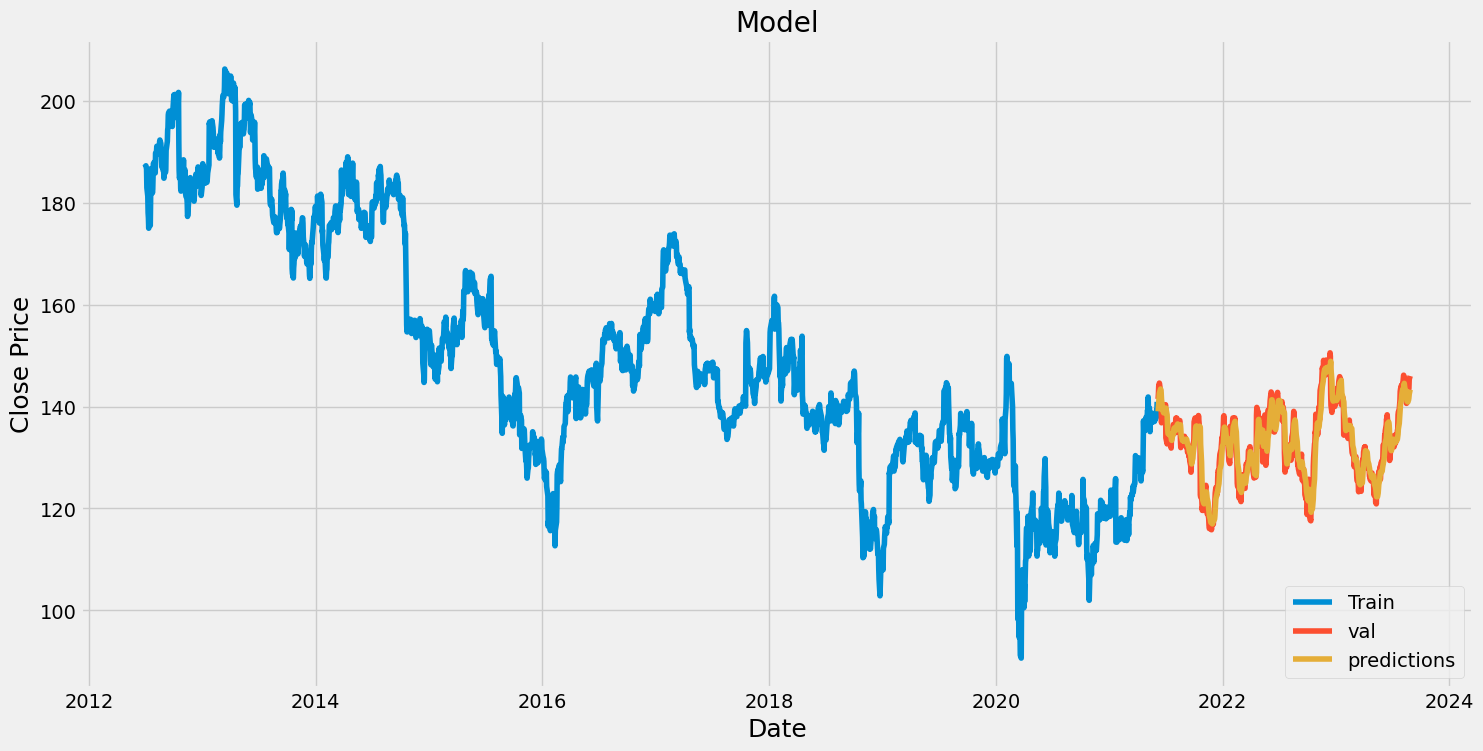

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the model
plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','val','predictions'], loc = 'lower right')
plt.show()


In [ ]:
#Show the valid and predicted price
valid

,Close,Predictions
Date,,
2021-06-07,141.510513,139.073959
2021-06-08,142.514343,139.883713
2021-06-09,144.043976,140.756454
2021-06-10,143.919693,141.802383
2021-06-11,144.627151,142.604630
...,...,...
2023-08-22,141.490005,141.180405
2023-08-23,143.410004,141.313782
2023-08-24,143.550003,141.860275


In [ ]:
#Get the quote
new_quote = yf.download('IBM', start='2012-06-29', end='2023-08-29')
#create a new dataframe
new_df = new_quote.filter(['Close'])
#Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the last 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
#predict the price for 30 Aug
print(pred_price)


[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 25ms/step
[[144.27278]]


In [ ]:
#Get the quote
new_quote2 = yf.download('IBM', start='2023-08-29', end='2023-08-31')
#Actual price at 30 AUG
print(new_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed
Date
2023-08-29    146.449997
2023-08-30    146.860001
Name: Close, dtype: float64
